# Data Exploration

In [43]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [44]:
# read in csv
speed_dating_data = pd.read_csv("Speed_Dating_Data.csv", encoding='ISO-8859-1', thousands="," )
sddf = speed_dating_data.copy()

In [45]:
# sets df to view all 195 columns of the data set
pd.set_option('display.max_columns', 200)

In [47]:
# sddf.info(max_cols=200)
sddf.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,

In [48]:
# we have 8378 records, where each record is a date
sddf.shape

(8378, 195)

In [49]:
# convert number values for gender, race, race_o (aka race of partner) to text values
sddf['gender'] = sddf.gender.apply(lambda x: "female" if x==0 else "male")

race_map = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", \
            4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

sddf['race'] = sddf.race.map(race_map)
sddf['race_o'] = sddf.race_o.map(race_map)

In [50]:
#sddf.sample(n=5)

In [51]:
sample_sddf = sddf[(sddf.wave>=5) & (sddf.wave<=10)].sample(n=100)


In [52]:
wave6_9_sddf = sddf[(sddf.wave>=6) & (sddf.wave<=9)]

In [53]:
# list(sample_sddf.columns)

In [54]:
sample_sddf[['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',\
 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', \
 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].sort_values('wave')

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
1845,5,25.00,10.00,20.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,10.00,20.00,20.00,10.00,10.00,4.0,6.0,4.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1833,5,80.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,20.00,10.00,10.00,NaN,NaN,5.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1828,5,80.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,20.00,10.00,10.00,NaN,NaN,5.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1718,5,50.00,15.00,10.00,10.00,10.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,70.00,5.00,5.00,10.00,5.00,5.00,8.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
1799,5,25.00,25.00,25.00,15.00,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,20.00,20.00,10.00,10.00,8.0,8.0,9.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
1761,5,50.00,10.00,20.00,5.00,5.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,50.00,10.00,5.00,5.00,10.00,8.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
1750,5,40.00,15.00,10.00,20.00,5.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,50.00,10.00,10.00,10.00,10.00,10.00,7.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
1688,5,20.00,10.00,30.00,20.00,15.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,10.00,20.00,20.00,0.00,10.00,8.0,7.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
1739,5,35.00,15.00,5.00,30.00,15.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,60.00,5.00,0.00,20.00,0.00,15.00,2.0,9.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN
1693,5,20.00,10.00,30.00,20.00,15.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,10.00,20.00,20.00,0.00,10.00,8.0,7.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN


In [55]:
# sddf['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
sample_sddf.attr1_1.describe()

count    99.000000
mean     19.768384
std      12.981978
min       7.500000
25%      15.090000
50%      16.670000
75%      19.590000
max      90.000000
Name: attr1_1, dtype: float64

In [56]:
wave6_9_sddf.attr1_1.describe()

count    1557.000000
mean       16.158304
std         3.515382
min         6.670000
25%        14.290000
50%        16.000000
75%        18.000000
max        27.780000
Name: attr1_1, dtype: float64

In [57]:
# gender = sddf['gender'].value_counts() 
# gender.plot(kind='bar', rot=0, figsize=(4,6), color)
# sns.plt.show()

# sns.barplot(x=sddf.gender.value_counts().index, y=sddf.gender.value_counts(), data=sddf, ci=None)
# sns.despine

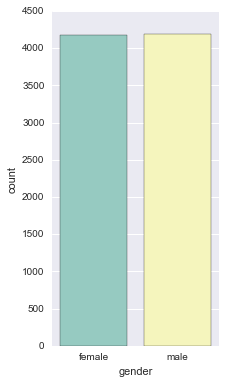

In [58]:
sns.set(rc={"figure.figsize": (3,6)})
sns.countplot(sddf.gender, palette='Set3')

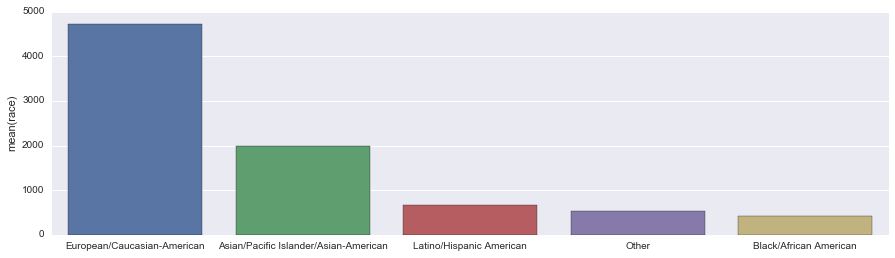

In [59]:
sns.set(rc={"figure.figsize": (15,4)})
b=sns.barplot(x=sddf.race.value_counts().index, y=sddf.race.value_counts(), data=sddf, ci=None )
b.set_xticklabels(b.get_xticklabels(), rotation=0)

# normal matplotlib plot
# race_plt = sddf['race'].value_counts()
# race_plt.plot(kind='bar', rot=45, figsize=(13,4), color=['b','r','y','g','c'])

In [60]:
# some people didn't report age, so need to drop NaN in the series
age_series = sddf.age.dropna()
age_series.shape

(8283,)

In [61]:
# see a distribution
# age_dist = sddf['age'].value_counts().sort_index()
# age_dist

# age_dist = pd.DataFrame()
# age_dist['age_dist_count'] = sddf.age.value_counts().sort_index()
# age_dist.index.name = 'age'
# age_dist

age_dist = sddf.groupby('age').size()
age_dist

age
18.0      10
19.0      20
20.0      55
21.0     291
22.0     655
23.0     894
24.0     863
25.0     837
26.0     869
27.0    1059
28.0     746
29.0     589
30.0     574
31.0     125
32.0     210
33.0     161
34.0     152
35.0      60
36.0      45
37.0       5
38.0      19
39.0      18
42.0      20
55.0       6
dtype: int64

/Users/Tony/Desktop/GA_DC12/Anaconda_3/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


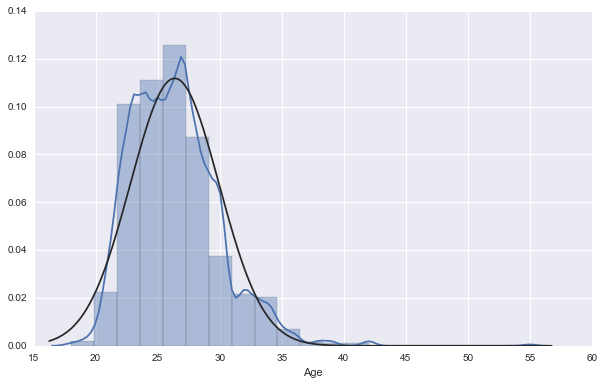

In [62]:
from scipy.stats import norm
sns.set(rc={"figure.figsize": (10,6)})
#sns.set_xticklabels([0,10,20,30,40,50,60])
sns.distplot(age_series, bins=20, hist=True, fit=norm, kde=True, axlabel="Age", norm_hist=True)

In [63]:
sddf.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [66]:
sddf.income.sample(n=30)

2782    40244.0
217     28418.0
2438    47997.0
5971        0.0
6438        0.0
2922    30855.0
6671        0.0
1450        0.0
1901    50745.0
4500    45788.0
3653    36594.0
1317        0.0
2914    30855.0
4533    51663.0
5981    50725.0
6489        0.0
1623    52804.0
5425    26298.0
1908    50745.0
1925        0.0
2090    97857.0
5369        0.0
4869        0.0
925     47559.0
8007        0.0
3746        0.0
3043    53501.0
6858        0.0
6281        0.0
5495        0.0
Name: income, dtype: float64

In [65]:
sddf.income.fillna(value=0, inplace=True)
sddf[['income']]=sddf[['income']].astype(np.float)

In [67]:
sp_df = speed_dating_data[['gender','age','age_o','race','race_o','samerace','income','match']]
sp_df.dropna(inplace=True)
sp_df.sample(n=50)

/Users/Tony/Desktop/GA_DC12/Anaconda_3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gender,age,age_o,race,race_o,samerace,income,match
115,1,22.0,23.0,2.0,4.0,0,29237.0,0
66,0,22.0,30.0,4.0,2.0,0,54620.0,0
5437,1,23.0,22.0,4.0,2.0,0,26298.0,0
6878,0,24.0,28.0,2.0,2.0,1,42967.0,0
8216,1,24.0,27.0,2.0,4.0,0,16767.0,0
2092,0,27.0,27.0,2.0,4.0,0,97857.0,0
5141,0,26.0,28.0,1.0,2.0,0,19264.0,0
7329,0,23.0,27.0,4.0,4.0,1,23707.0,1
7315,1,32.0,29.0,6.0,4.0,0,35409.0,1
6406,1,29.0,22.0,2.0,2.0,1,55080.0,1


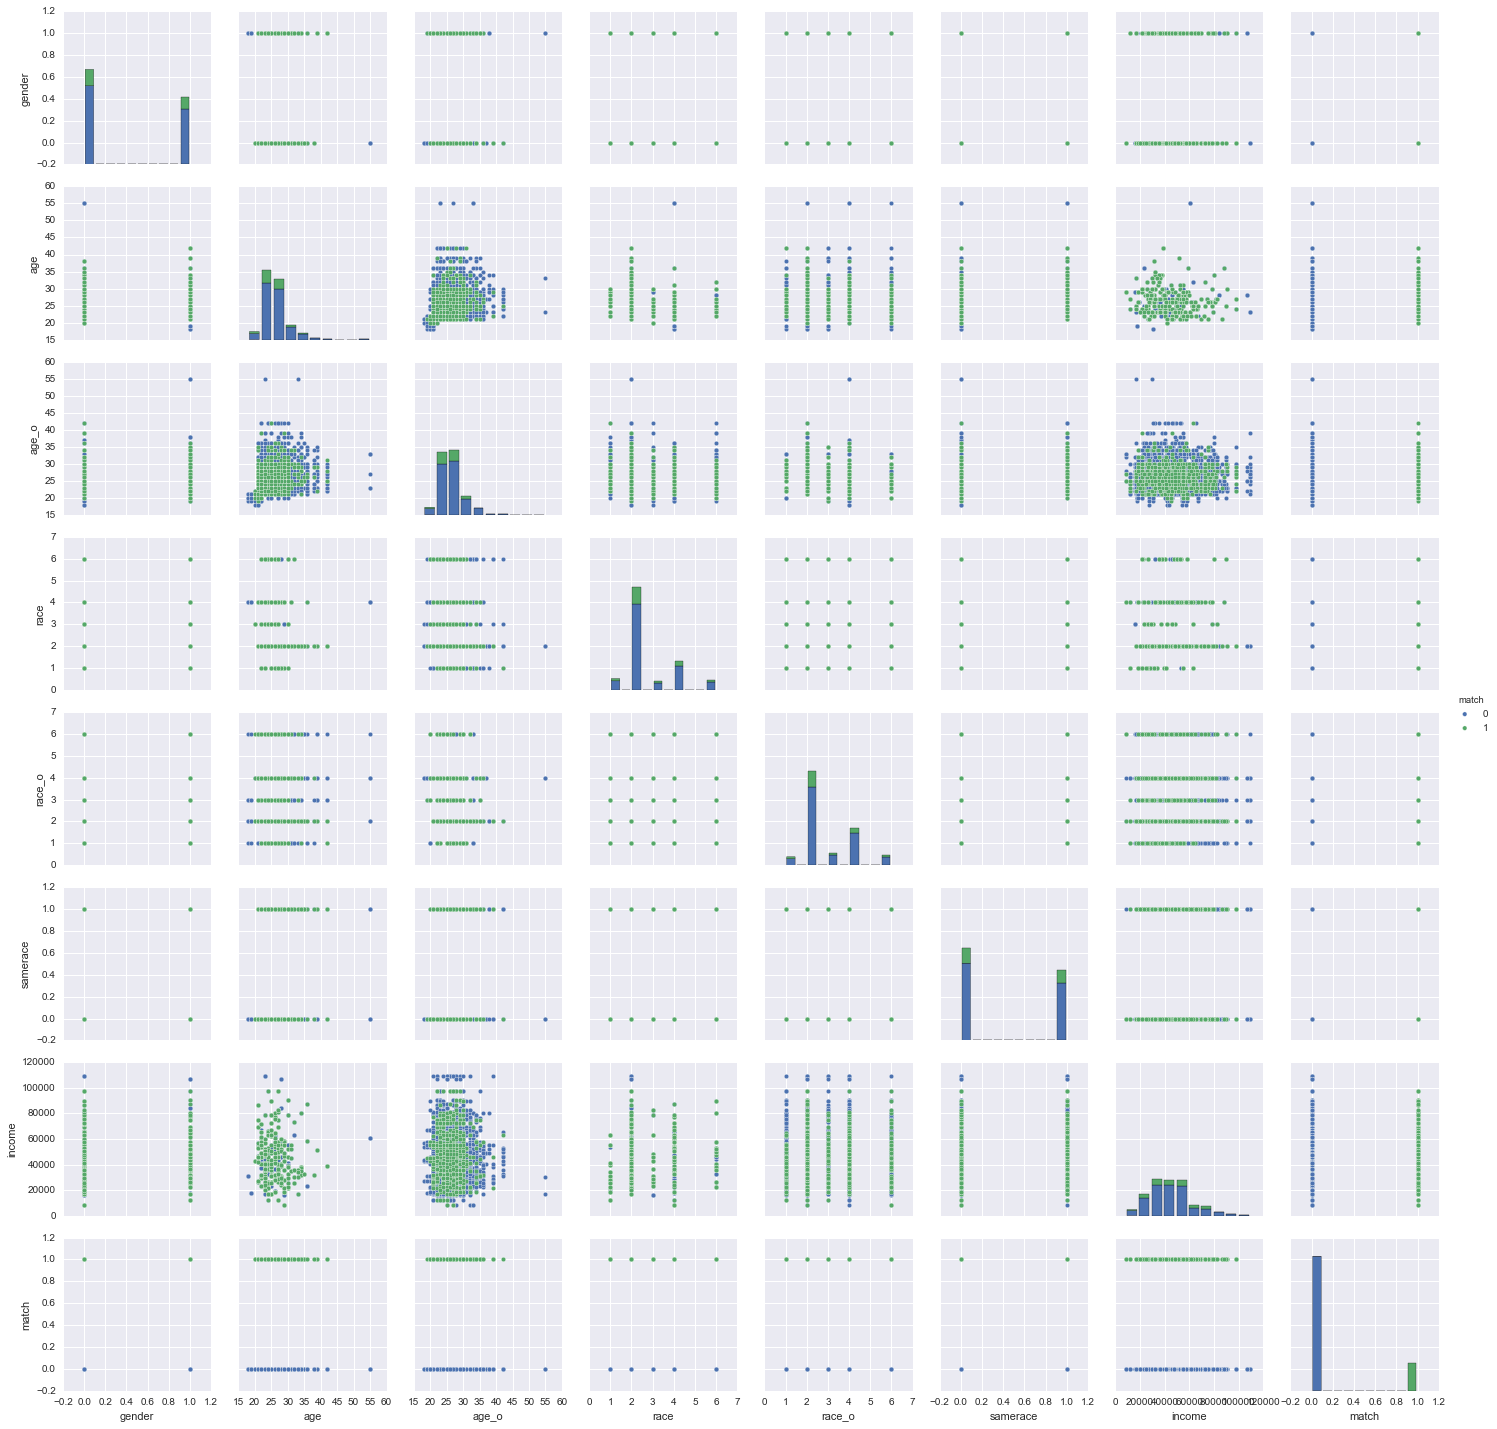

In [68]:
sns.pairplot(sp_df, hue="match")

# from pandas.tools.plotting import scatter_matrix